In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print("Training samples", len(X_train))
print("Test samples", len(X_test))

print("Shape of individual images:", X_train[0].shape)

Training samples 60000
Test samples 10000
Shape of individual images: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

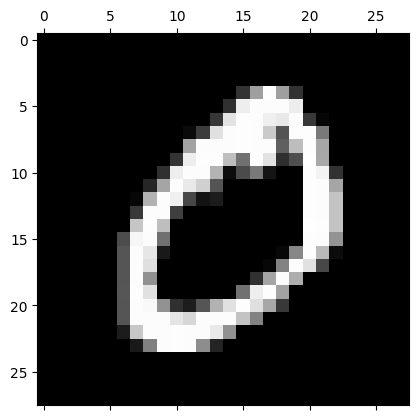

In [7]:
plt.matshow(X_train[1], cmap='gray')

In [8]:
y_train[1]

0

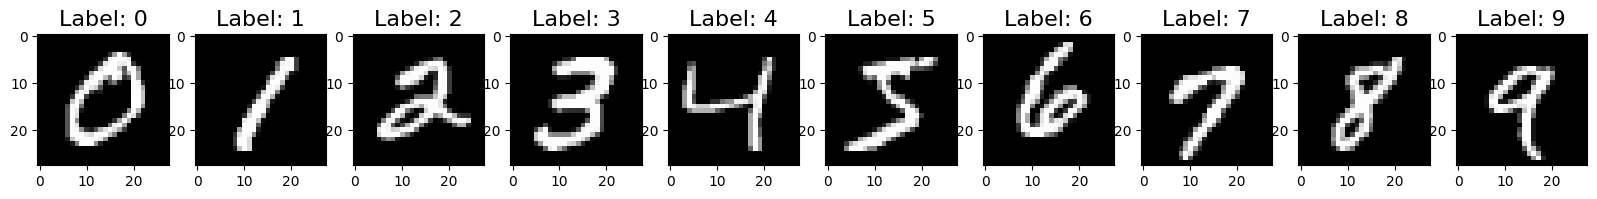

In [9]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20, 20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [10]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the pixel values to the range [0, 1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
for r in X_train[2]:
    for c in r: 
        if c >0:
            print(c)

0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays

In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we transform the data into a format that the neural network can work with. This is because the underlying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

In [14]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an initial Neaural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28x28 pixels in each image) and the output layer will have 10 neurons as we want to predict a digit, 0-9.

In [34]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='softmax')
    ]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4683 - accuracy: 0.8783
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9212
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9230
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9295
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [35]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [36]:
y_predicted[1]

array([2.5317492e-04, 1.6077864e-06, 9.9366897e-01, 6.3289139e-05,
       5.8652394e-15, 1.9717179e-03, 3.9872038e-03, 1.1009645e-18,
       5.4142332e-05, 1.5436755e-15], dtype=float32)

In [37]:
np.argmax(y_predicted[1])

2

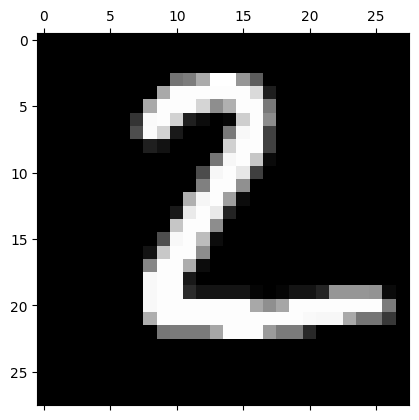

In [38]:
plt.matshow(X_test[1], cmap='gray')

In [39]:
y_test[1]

2

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [42]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [43]:
# Check against the first 10 labels
print(y_predicted_labels[:10])
print(','.join([str(c) for c in y_test[:10]]))

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7,2,1,0,4,1,4,9,5,9


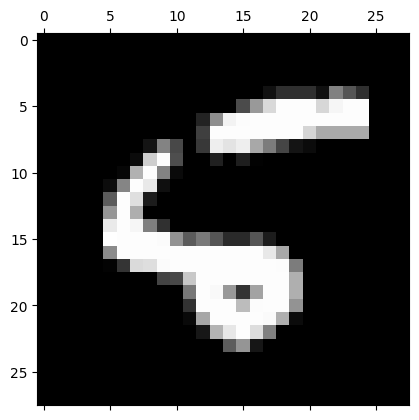

In [44]:
plt.matshow(X_test[8], cmap='gray')

Create a confusion matrix to see how well the model performed

In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [46]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    6,    6,    4,    1,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    8,  922,   15,    7,    3,   12,   13,   44,    2],
       [   3,    0,   15,  921,    0,   21,    3,   13,   28,    6],
       [   1,    1,    4,    2,  912,    0,   10,    5,   10,   37],
       [   7,    2,    1,   39,    8,  762,   15,    9,   42,    7],
       [  10,    3,    6,    1,    7,   10,  916,    2,    3,    0],
       [   1,    6,   22,    3,    3,    1,    0,  960,    4,   28],
       [   5,    6,    4,   16,    9,   17,    7,   12,  892,    6],
       [   9,    7,    1,    7,   23,    6,    0,   31,    9,  916]])>

Text(95.72222222222221, 0.5, 'Truth')

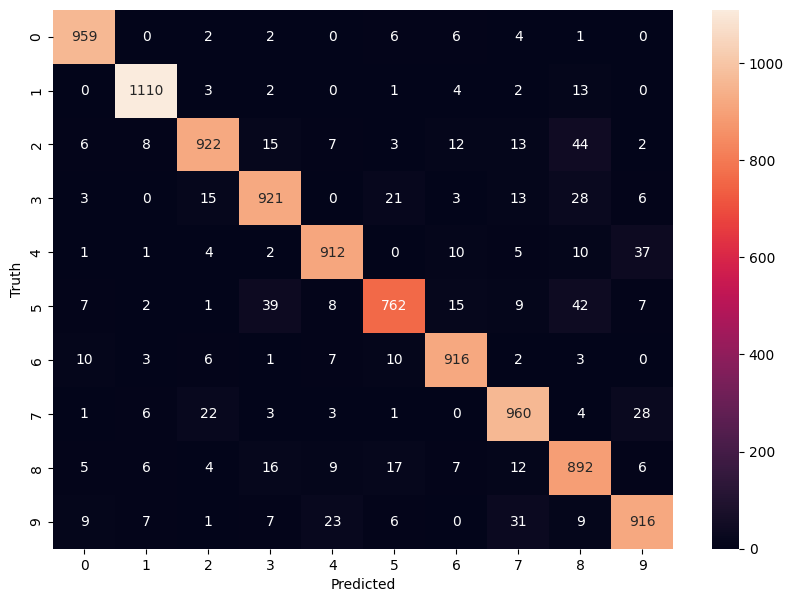

In [47]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [49]:
y_errors_indexes = [i for i, error in enumerate(errors) if error]
len(y_errors_indexes)

730

# Check a few random predictions

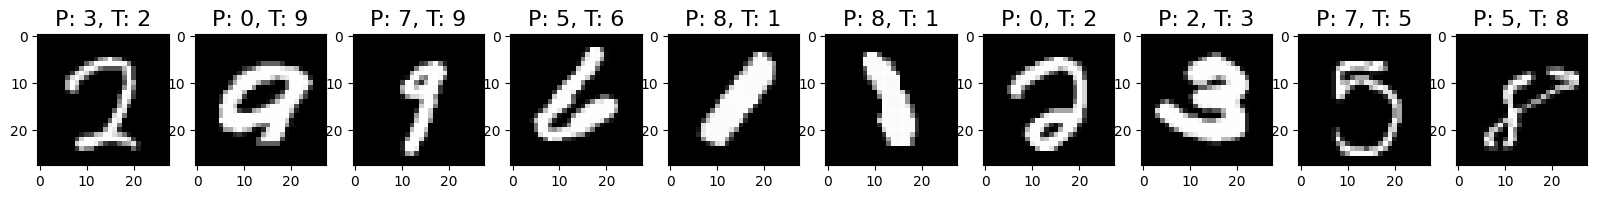

In [33]:
import random

idx_to_check = [y_errors_indexes[random.randint(0, len(y_errors_indexes) - 1)] for _ in range(10)]

num_classes = 10

_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i, idx in enumerate(idx_to_check):
    sample = X_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P: {predicted_value}, T: {true_value}', fontsize=16)

In [56]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784,), activation="relu"),
        keras.layers.Dense(10, activation='softmax')
    ]
)

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2373 - accuracy: 0.9305
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1001 - accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0646 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0277 - accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0178 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.011

In [57]:
y_predicted2 = model2.predict(X_test_flattened)

313/313 [==============================] - 0s 993us/step


In [58]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]

In [59]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)

Text(95.72222222222221, 0.5, 'Truth')

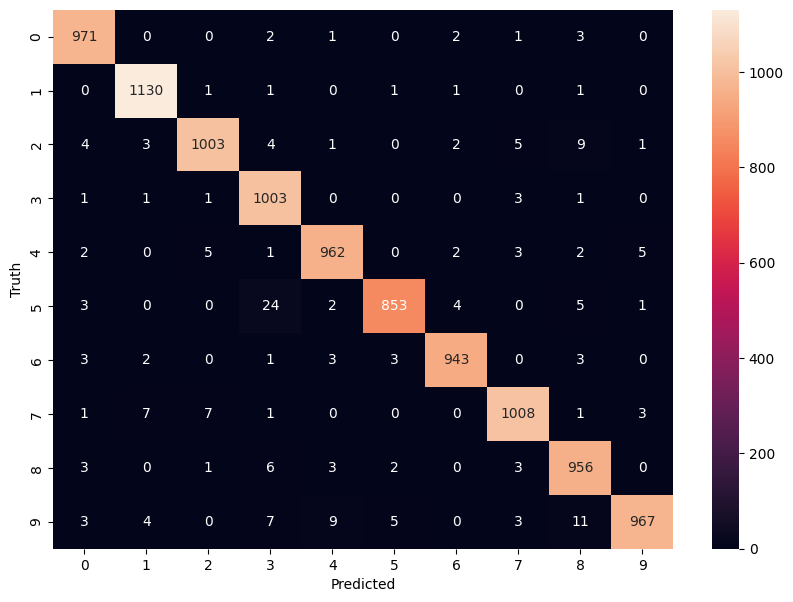

In [60]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
errors2 = (y_predicted_labels2 - y_test != 0)
y_error_indexes2 = [i for i, error in enumerate(errors2) if error]
len(y_error_indexes2)

204